In [1]:
#前処理してくぜ
#お引越し
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv("test.csv")

In [2]:
#datetime	日時（YYYY-MM-DD）	文字列
#y	引越し数	数値：整数
#client	法人が絡む特殊な引越し日フラグ	数値：整数（0,1）
#close	休業日	数値：整数（0,1）
#price_am	午前の料金区分（-1は欠損を表す。5が最も料金が高い）	数値：整数（-1,0,1,2,3,4,5）
#price_pm	午後の料金区分（-1は欠損を表す。5が最も料金が高い）	数値：整数（-1,0,1,2,3,4,5）

In [3]:
train_df_y = train_df[["y"]]
train_df = train_df.drop(["y"],axis=1)

In [4]:
train_df_y.reset_index()

,index,y
0,0,17
1,1,18
2,2,20
3,3,20
4,4,14
5,5,14
6,6,4
7,7,10
8,8,12
9,9,21


In [5]:
df = pd.concat([train_df,test_df])

In [6]:
df['datetime'] = pd.to_datetime(df.datetime)
#何月か
df['Month'] = df['datetime'].dt.month
#何日か
df['DayofMonth'] = df['datetime'].dt.day
#何曜日か
df['dayofweek'] = df['datetime'].dt.dayofweek
#何年か
df['year'] = df['datetime'].dt.year

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["year"])

df["year_num"] = le.transform(df["year"]) 

In [8]:
#df["year_num"] = df["year"].map({"2010":1,"2011":2,"2012":3,"2013":4,"2014":5,"2016":6,"2017":7})

In [9]:
#ダミー変数化
#何月か
month_df = pd.get_dummies(df['Month'], prefix='M', prefix_sep='_')
#何日か
dayofmonth_df = pd.get_dummies(df["DayofMonth"], prefix='DM', prefix_sep='_')
#何曜日か
dayofweek_df = pd.get_dummies(df['dayofweek'], prefix='DW', prefix_sep='_')
#何年か
#year_df= pd.get_dummies(df['year'], prefix='y', prefix_sep='_')

In [10]:
#datetimeを保存
df_id = df[['datetime']]

In [11]:
#year_df削除
df = pd.concat([df,
                month_df,
                dayofmonth_df,
                dayofweek_df], axis=1)

In [12]:
train_df = df[0:2101].reset_index()

In [13]:
train_df = pd.concat([train_df,train_df_y],axis=1)

In [14]:
train_df = train_df.drop("index",axis=1)

In [15]:
train_df.head()

,datetime,client,close,price_am,price_pm,Month,DayofMonth,dayofweek,year,year_num,...,DM_30,DM_31,DW_0,DW_1,DW_2,DW_3,DW_4,DW_5,DW_6,y
0,2010-07-01,0,0,-1,-1,7,1,3,2010,0,...,0,0,0,0,0,1,0,0,0,17
1,2010-07-02,0,0,-1,-1,7,2,4,2010,0,...,0,0,0,0,0,0,1,0,0,18
2,2010-07-03,0,0,-1,-1,7,3,5,2010,0,...,0,0,0,0,0,0,0,1,0,20
3,2010-07-04,0,0,-1,-1,7,4,6,2010,0,...,0,0,0,0,0,0,0,0,1,20
4,2010-07-05,0,0,-1,-1,7,5,0,2010,0,...,0,0,1,0,0,0,0,0,0,14


In [16]:
train_df.groupby("year_num")["y"].mean()

year_num
0    16.298913
1    18.991781
2    30.500000
3    40.320548
4    39.665753
5    44.597260
6    55.714286
Name: y, dtype: float64

In [17]:
test_df = df[2101:]

In [18]:
test_df.head()

,datetime,client,close,price_am,price_pm,Month,DayofMonth,dayofweek,year,year_num,...,DM_29,DM_30,DM_31,DW_0,DW_1,DW_2,DW_3,DW_4,DW_5,DW_6
0,2016-04-01,1,0,3,2,4,1,4,2016,6,...,0,0,0,0,0,0,0,1,0,0
1,2016-04-02,0,0,5,5,4,2,5,2016,6,...,0,0,0,0,0,0,0,0,1,0
2,2016-04-03,1,0,2,2,4,3,6,2016,6,...,0,0,0,0,0,0,0,0,0,1
3,2016-04-04,1,0,1,1,4,4,0,2016,6,...,0,0,0,1,0,0,0,0,0,0
4,2016-04-05,0,0,1,1,4,5,1,2016,6,...,0,0,0,0,1,0,0,0,0,0


In [19]:
test_df.columns

Index(['datetime', 'client', 'close', 'price_am', 'price_pm', 'Month',
       'DayofMonth', 'dayofweek', 'year', 'year_num', 'M_1', 'M_2', 'M_3',
       'M_4', 'M_5', 'M_6', 'M_7', 'M_8', 'M_9', 'M_10', 'M_11', 'M_12',
       'DM_1', 'DM_2', 'DM_3', 'DM_4', 'DM_5', 'DM_6', 'DM_7', 'DM_8', 'DM_9',
       'DM_10', 'DM_11', 'DM_12', 'DM_13', 'DM_14', 'DM_15', 'DM_16', 'DM_17',
       'DM_18', 'DM_19', 'DM_20', 'DM_21', 'DM_22', 'DM_23', 'DM_24', 'DM_25',
       'DM_26', 'DM_27', 'DM_28', 'DM_29', 'DM_30', 'DM_31', 'DW_0', 'DW_1',
       'DW_2', 'DW_3', 'DW_4', 'DW_5', 'DW_6'],
      dtype='object')

In [20]:
train_df.groupby("price_am")["y"].mean(),train_df.groupby("price_am")["y"].size()

(price_am
 -1    14.289100
  0    28.501587
  1    39.141397
  2    47.312000
  3    58.934783
  4    67.363636
  5    67.241379
 Name: y, dtype: float64, price_am
 -1    211
  0    945
  1    587
  2    250
  3     46
  4     33
  5     29
 Name: y, dtype: int64)

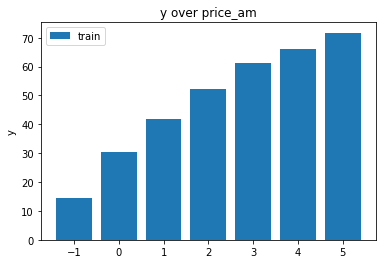

In [21]:
plt.bar(train_df["price_am"].unique(),train_df.groupby("price_pm")["y"].mean(),label='train')

plt.title('y over price_am')
plt.legend(loc=0)
plt.ylabel('y')
plt.show()

In [22]:
train_df.groupby("price_pm")["y"].mean(),train_df.groupby("price_pm")["y"].size()

(price_pm
 -1    14.316038
  0    30.361881
  1    41.989919
  2    52.128000
  3    61.382353
  4    71.733333
  5    66.076923
 Name: y, dtype: float64, price_pm
 -1     212
  0    1191
  1     496
  2     125
  3      34
  4      30
  5      13
 Name: y, dtype: int64)

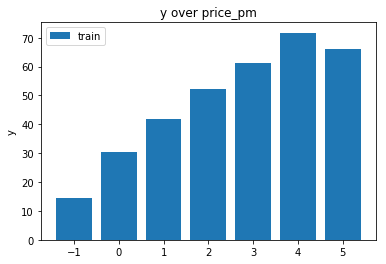

In [23]:
plt.bar(train_df["price_pm"].unique(),train_df.groupby("price_pm")["y"].mean(),label='train')

plt.title('y over price_pm')
plt.legend(loc=0)
plt.ylabel('y')
plt.show()

In [24]:
train_df.groupby("year_num")["y"].mean(),train_df.groupby("year_num")["y"].size()

(year_num
 0    16.298913
 1    18.991781
 2    30.500000
 3    40.320548
 4    39.665753
 5    44.597260
 6    55.714286
 Name: y, dtype: float64, year_num
 0    184
 1    365
 2    366
 3    365
 4    365
 5    365
 6     91
 Name: y, dtype: int64)

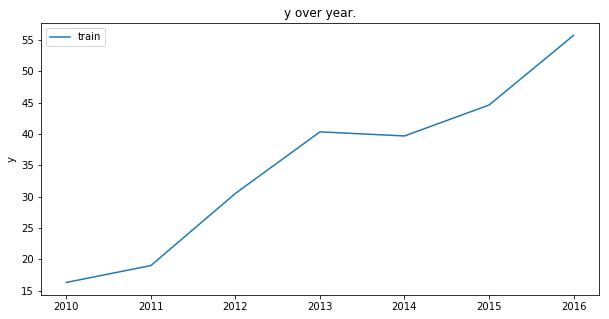

In [25]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(train_df.groupby("year")["y"].mean(),label='train')

plt.title('y over year.')
plt.legend(loc=0)
plt.ylabel('y')
plt.show()

In [26]:
#closeが1なら0を返す必要性
train_df.groupby("close")["y"].mean(),train_df.groupby("close")["y"].size()

(close
 0    34.540501
 1     0.000000
 Name: y, dtype: float64, close
 0    2074
 1      27
 Name: y, dtype: int64)

In [27]:
#close == 1の時price_am,price_pm共に-1
train_df[train_df["close"]==1]

,datetime,client,close,price_am,price_pm,Month,DayofMonth,dayofweek,year,year_num,...,DM_30,DM_31,DW_0,DW_1,DW_2,DW_3,DW_4,DW_5,DW_6,y
183,2010-12-31,0,1,-1,-1,12,31,4,2010,0,...,0,1,0,0,0,0,1,0,0,0
184,2011-01-01,0,1,-1,-1,1,1,5,2011,1,...,0,0,0,0,0,0,0,1,0,0
185,2011-01-02,0,1,-1,-1,1,2,6,2011,1,...,0,0,0,0,0,0,0,0,1,0
186,2011-01-03,0,1,-1,-1,1,3,0,2011,1,...,0,0,1,0,0,0,0,0,0,0
548,2011-12-31,0,1,-1,-1,12,31,5,2011,1,...,0,1,0,0,0,0,0,1,0,0
549,2012-01-01,0,1,-1,-1,1,1,6,2012,2,...,0,0,0,0,0,0,0,0,1,0
550,2012-01-02,0,1,-1,-1,1,2,0,2012,2,...,0,0,1,0,0,0,0,0,0,0
551,2012-01-03,0,1,-1,-1,1,3,1,2012,2,...,0,0,0,1,0,0,0,0,0,0
914,2012-12-31,0,1,-1,-1,12,31,0,2012,2,...,0,1,1,0,0,0,0,0,0,0
915,2013-01-01,0,1,-1,-1,1,1,1,2013,3,...,0,0,0,1,0,0,0,0,0,0


In [28]:
train_df.groupby("client")["y"].mean(),train_df.groupby("client")["y"].size()

(client
 0    32.305013
 1    50.577670
 Name: y, dtype: float64, client
 0    1895
 1     206
 Name: y, dtype: int64)

In [29]:
train_df.groupby("Month")["y"].mean(),train_df.groupby("Month")["y"].size()

(Month
 1     26.586022
 2     38.729412
 3     58.005376
 4     40.320000
 5     29.709677
 6     31.466667
 7     29.467742
 8     29.327957
 9     32.305556
 10    31.225806
 11    29.650000
 12    32.526882
 Name: y, dtype: float64, Month
 1     186
 2     170
 3     186
 4     150
 5     155
 6     150
 7     186
 8     186
 9     180
 10    186
 11    180
 12    186
 Name: y, dtype: int64)

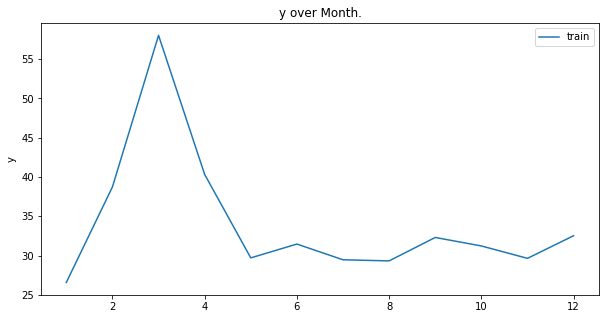

In [30]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(train_df.groupby("Month")["y"].mean(),label='train')

plt.title('y over Month.')
plt.legend(loc=0)
plt.ylabel('y')
plt.show()

In [31]:
train_df.groupby("DayofMonth")["y"].mean(),train_df.groupby("DayofMonth")["y"].size()

(DayofMonth
 1     36.028986
 2     30.811594
 3     29.724638
 4     30.014493
 5     28.753623
 6     27.811594
 7     27.985507
 8     27.130435
 9     26.724638
 10    30.173913
 11    28.246377
 12    28.188406
 13    30.275362
 14    30.086957
 15    32.768116
 16    33.376812
 17    31.507246
 18    32.507246
 19    33.289855
 20    36.652174
 21    35.942029
 22    36.782609
 23    37.840580
 24    39.811594
 25    40.000000
 26    41.811594
 27    42.797101
 28    44.594203
 29    45.061538
 30    43.714286
 31    40.756098
 Name: y, dtype: float64, DayofMonth
 1     69
 2     69
 3     69
 4     69
 5     69
 6     69
 7     69
 8     69
 9     69
 10    69
 11    69
 12    69
 13    69
 14    69
 15    69
 16    69
 17    69
 18    69
 19    69
 20    69
 21    69
 22    69
 23    69
 24    69
 25    69
 26    69
 27    69
 28    69
 29    65
 30    63
 31    41
 Name: y, dtype: int64)

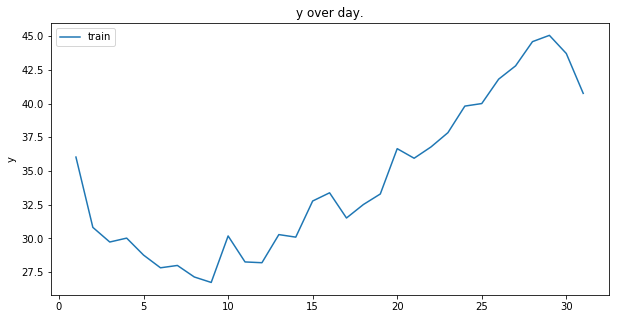

In [32]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(train_df.groupby("DayofMonth")["y"].mean(),label='train')

plt.title('y over day.')
plt.legend(loc=0)
plt.ylabel('y')
plt.show()

In [33]:
#The day of the week with Monday=0, Sunday=6
train_df.groupby("dayofweek")["y"].mean(),train_df.groupby("dayofweek")["y"].size()

(dayofweek
 0    33.826667
 1    30.540000
 2    29.840000
 3    30.551495
 4    34.310000
 5    41.290000
 6    38.330000
 Name: y, dtype: float64, dayofweek
 0    300
 1    300
 2    300
 3    301
 4    300
 5    300
 6    300
 Name: y, dtype: int64)

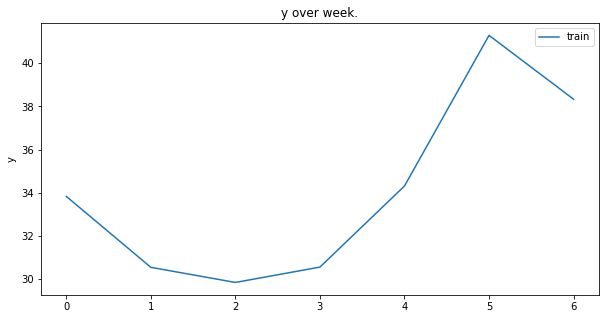

In [34]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(train_df.groupby("dayofweek")["y"].mean(),label='train')

plt.title('y over week.')
plt.legend(loc=0)
plt.ylabel('y')
plt.show()

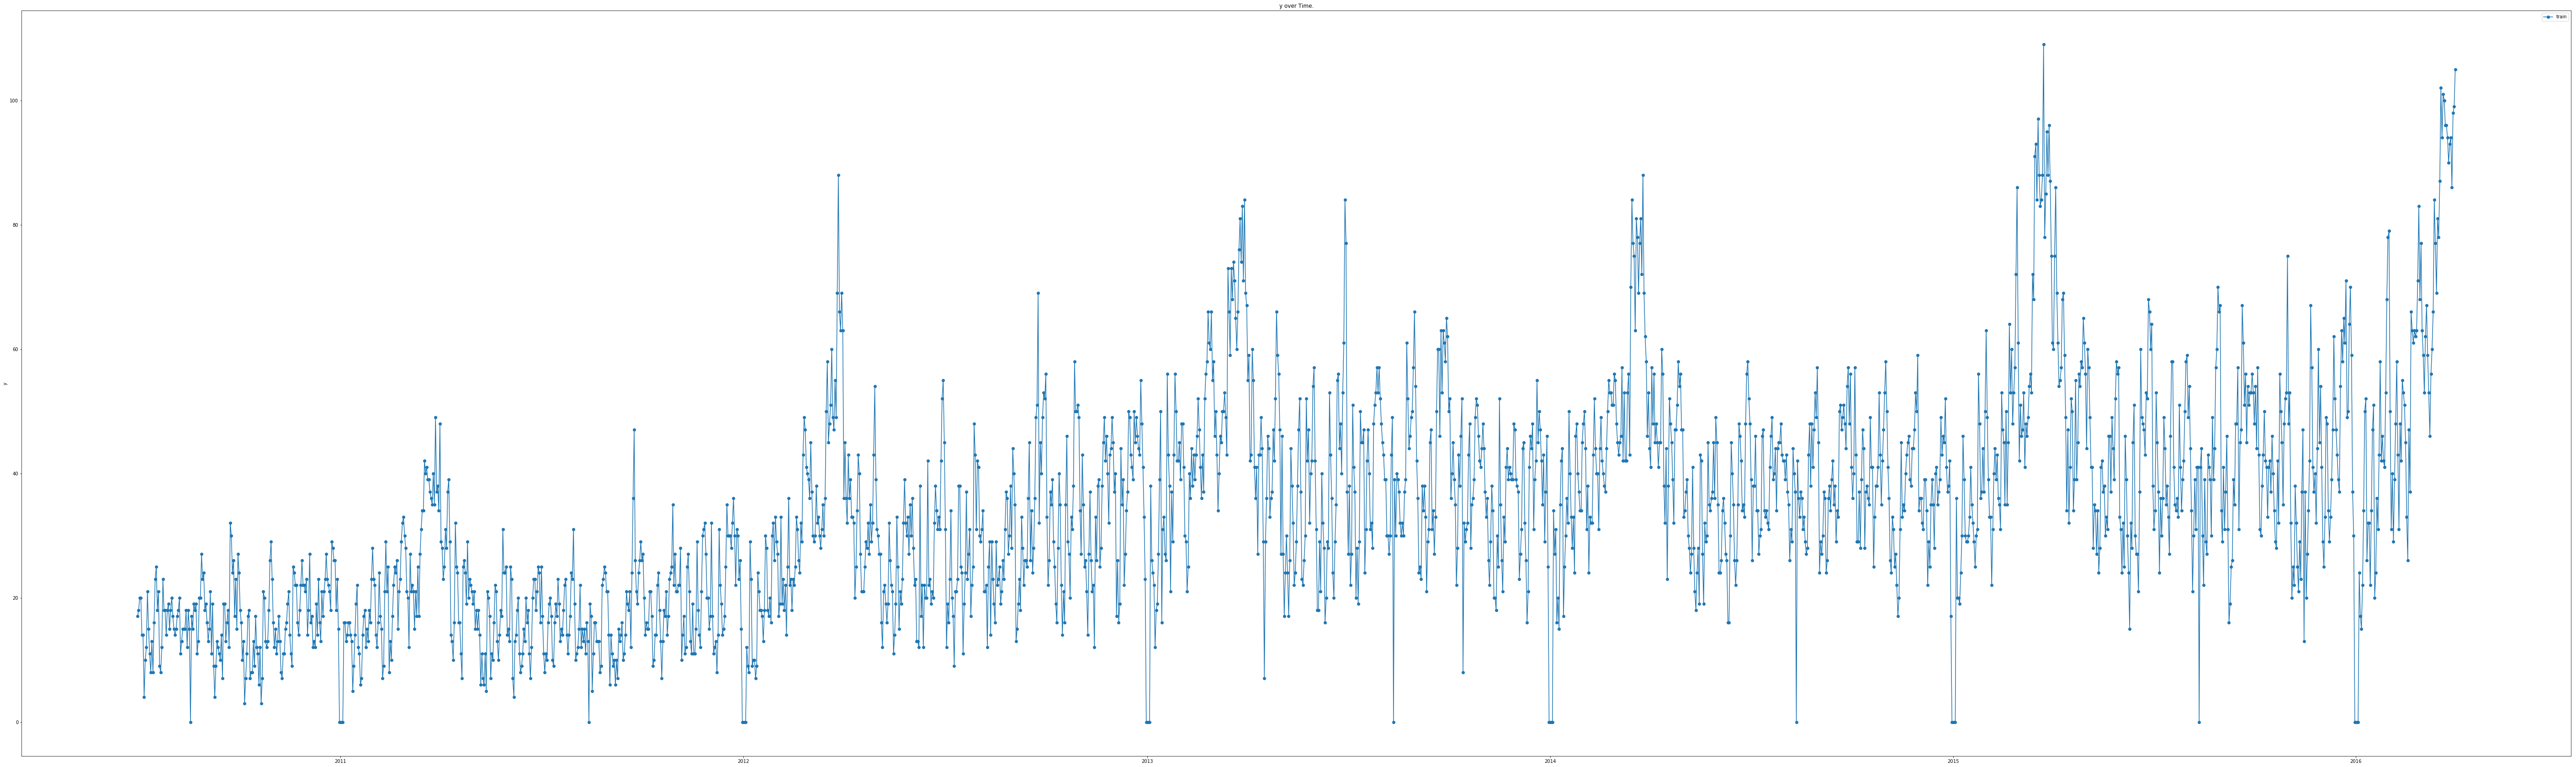

In [35]:
plt.rcParams['figure.figsize'] = [100, 30]
plt.plot(train_df['datetime'],train_df['y'], 'o-', label='train')

plt.title('y over Time.')
plt.legend(loc=0)
plt.ylabel('y')
plt.show()

In [36]:
#重回帰分析で予測
from sklearn import linear_model
clf = linear_model.LinearRegression()
 


X = train_df.drop(["datetime",'dayofweek',"DayofMonth","Month","y","year"], axis=1)
 

Y = train_df["y"]
 
# 予測モデルを作成
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
print(clf.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [38]:
pred = clf.predict(test_df.drop(["datetime",'dayofweek',"DayofMonth","Month","year"], axis=1))

In [39]:
#xgboost設定をちょっといじったやつ
# from sklearn.model_selection import train_test_split
# import xgboost as xgb
#Train, Test = train_test_split(train_df[train_df["price_pm"]>-1], test_size = 0.2)
# X_train = Train.drop(["datetime",'dayofweek',"DayofMonth","Month","y","year"], axis=1)
# Y_train = Train["y"]
# X_test = Test.drop(["datetime",'dayofweek',"DayofMonth","Month","y","year"], axis=1)
# Y_test = Test["y"]

# Y_test = Y_test.reset_index().drop('index',axis = 1)
# Y_train = Y_train.reset_index().drop('index',axis = 1)
# dtrain = xgb.DMatrix(X_train, label=Y_train)
# dvalid = xgb.DMatrix(X_test, label=Y_test)
# dtest = xgb.DMatrix(test_df.drop(["datetime",'dayofweek',"DayofMonth","Month","year"], axis=1))
# watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9, 
#             'max_depth': 6,
# 'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
# 'eval_metric': 'rmse', 'objective': 'reg:linear'}
# model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=2,
#       maximize=False, verbose_eval=1)
# print('Modeling RMSLE %.5f' % model.best_score)
#pred_xgb = model.predict(dtest)
#test_df["y"] = pred_xgb
#submission = pd.concat([test_df.datetime, test_df.y], axis=1)
#submission.to_csv("submission.csv", index=False,header=False)

In [40]:
#xgboostで回帰モデル生成
import xgboost as xgb
#モデルのインスタンス作成
mod = xgb.XGBRegressor()
#欠損値のデータを学習させずにモデル生成
X = train_df[train_df["price_pm"]>-1].drop(["datetime",'dayofweek',"DayofMonth","Month","y","year"], axis=1)
Y = train_df[train_df["price_pm"]>-1]["y"]
mod.fit(X,Y)

/Users/haradakeno/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [41]:
#説明変数
X.columns

Index(['client', 'close', 'price_am', 'price_pm', 'year_num', 'M_1', 'M_2',
       'M_3', 'M_4', 'M_5', 'M_6', 'M_7', 'M_8', 'M_9', 'M_10', 'M_11', 'M_12',
       'DM_1', 'DM_2', 'DM_3', 'DM_4', 'DM_5', 'DM_6', 'DM_7', 'DM_8', 'DM_9',
       'DM_10', 'DM_11', 'DM_12', 'DM_13', 'DM_14', 'DM_15', 'DM_16', 'DM_17',
       'DM_18', 'DM_19', 'DM_20', 'DM_21', 'DM_22', 'DM_23', 'DM_24', 'DM_25',
       'DM_26', 'DM_27', 'DM_28', 'DM_29', 'DM_30', 'DM_31', 'DW_0', 'DW_1',
       'DW_2', 'DW_3', 'DW_4', 'DW_5', 'DW_6'],
      dtype='object')

In [42]:
pred_xgb= mod.predict(test_df.drop(["datetime",'dayofweek',"DayofMonth","Month","year"], axis=1))

In [43]:
test_df["y"] = pred_xgb
test_df["y"][test_df["close"]==1] = int(0)
submission = pd.concat([test_df.datetime, test_df.y], axis=1)
submission.to_csv("submission.csv", index=False,header=False)

/Users/haradakeno/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/haradakeno/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/haradakeno/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  se

In [44]:
#とりあえずこのデータだけでbenchmarkは越せた

#yearを含んだほうが良い？？
#year_numだけだと精度が下がった　なぜや？？

#この後どのようなデータを読み込ませるか

In [45]:
#欠損値の扱いをどうするか 212個
train_df[train_df["price_pm"]==-1]

,datetime,client,close,price_am,price_pm,Month,DayofMonth,dayofweek,year,year_num,...,DM_30,DM_31,DW_0,DW_1,DW_2,DW_3,DW_4,DW_5,DW_6,y
0,2010-07-01,0,0,-1,-1,7,1,3,2010,0,...,0,0,0,0,0,1,0,0,0,17
1,2010-07-02,0,0,-1,-1,7,2,4,2010,0,...,0,0,0,0,0,0,1,0,0,18
2,2010-07-03,0,0,-1,-1,7,3,5,2010,0,...,0,0,0,0,0,0,0,1,0,20
3,2010-07-04,0,0,-1,-1,7,4,6,2010,0,...,0,0,0,0,0,0,0,0,1,20
4,2010-07-05,0,0,-1,-1,7,5,0,2010,0,...,0,0,1,0,0,0,0,0,0,14
5,2010-07-06,0,0,-1,-1,7,6,1,2010,0,...,0,0,0,1,0,0,0,0,0,14
6,2010-07-07,0,0,-1,-1,7,7,2,2010,0,...,0,0,0,0,1,0,0,0,0,4
7,2010-07-08,0,0,-1,-1,7,8,3,2010,0,...,0,0,0,0,0,1,0,0,0,10
8,2010-07-09,0,0,-1,-1,7,9,4,2010,0,...,0,0,0,0,0,0,1,0,0,12
9,2010-07-10,0,0,-1,-1,7,10,5,2010,0,...,0,0,0,0,0,0,0,1,0,21
